# Introduction à la classification avec la régression logistique

Pourquoi la régression linéaire n'est pas adaptée à la classification binaire.

On pourrait se dire "la régression linéaire me permet de prédire n'importe quelle valeur, utilisons là pour faire de la classification binaire". 

Eh bien non, c'est pas terrible, voyons pourquoi





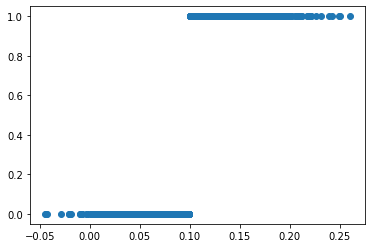

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('tumor_data_one_var.csv')
plt.scatter(df['size'], df['is_cancerous'])


En regardant les donnée on se dit qu'une régression linéaire à une variable va difficilement passer correctement par ces points

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X = df[['size']]
y = df['is_cancerous']
model.fit(X,y)

LinearRegression()

In [ ]:
import numpy as np
X_range = np.arange(-0.05, 0.25, 0.01).reshape(-1, 1) #pour que ça soit un tableau 2D car sklearn veut des tableaux 2D pour X
y_pred = model.predict(X_range)

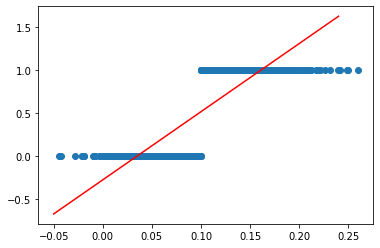

In [ ]:
y_pred = model.predict(X_range)
plt.scatter(df['size'], df['is_cancerous'])
plt.plot(X_range, y_pred, c="red")

On voit que la régression linéaire n'est pas adaptée à la forme des données

En choisissant une régression linéaire pour ce problème, on a pas choisi la bonne famille de fonction. On aura beau chercher les meilleurs paramètres possibles, ça n'ira pas bien.  Une fonction de la forme $ \theta_0 + \theta_1 * X $ ne conviendra jamais

On va donc considérer une autre famille de modèle adadpté à la classification binaire : la régression logistique. 

On va pas faire on va choisir $ y = \sigma( \theta_0 + \theta_1 * X_1 + \theta_2 * X_2 + ... + \theta_n * X_n) $

où $ \sigma $ est la fonction sigmoid (bijection de la fonction logit)

$ y = \frac{1}{1 - (\theta_0 + \theta_1 * X_1 + \theta_2 * X_2 + ... + \theta_n * X_n)} $

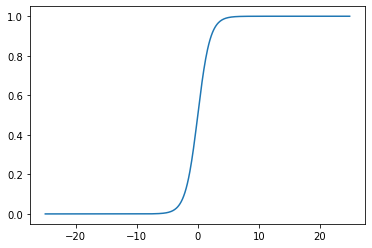

In [ ]:
# affichage de la fonction sigmoid
def sigmoid(x): 

    return 1 / (1 + np.exp(-x))


x = np.arange(-25, 25, 0.1)
y = sigmoid(x)
plt.plot(x, y)

On constate que la fonction sigmoid transforme l'ensemble des Réels en un nombre entre 0 et 1 : c'est très bien pour faire de la classification binaire ! 

Ainsi une régression logistique ça va être juste la composition de la fonction logistique et d'une régression linéaire : 
- les thetas de la formule de la régression linéaire vont permettre d'ajuster la courbe aux données
- la fonction logistique permettra à la fonction d'avoir la bonne forme


In [ ]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression()

model.fit(X, y)

LogisticRegression()

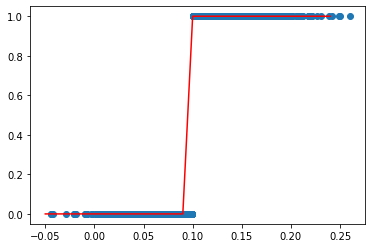

In [ ]:
y_pred = model.predict(X_range)
plt.scatter(df['size'], df['is_cancerous'])
plt.plot(X_range, y_pred, c="red")

C'est bien mieux

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=25ad01f7-ec4b-4ac8-bce6-a3745ef02c96' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>